<a href="https://colab.research.google.com/github/Khalidhussainn/Final_Year_Project/blob/main/ML/AFC/Anomalous_file_creation(working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import numpy as np
import pandas as pd

In [206]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AFC/AFC_data(Du).csv")

# Step 2: Select Important Field

In [207]:
columns = df.columns.tolist()
columns

['syscheck.event',
 'syscheck.path',
 'syscheck.attrs_after',
 'syscheck.changed_attributes',
 'syscheck.size_before',
 'syscheck.size_after',
 'syscheck.mtime_before',
 'syscheck.mtime_after',
 'syscheck.md5_before',
 'syscheck.md5_after',
 'syscheck.uid_after',
 'syscheck.uname_after',
 'syscheck.arch',
 'agent.name',
 '@timestamp']

> Showing basic information

In [208]:
df.shape

(10000, 15)

In [209]:
df = df.drop([
    'syscheck.attrs_after',
    'syscheck.changed_attributes',
    'syscheck.mtime_before',
    'syscheck.mtime_after',
    'syscheck.md5_before',
    'syscheck.md5_after',
    'syscheck.uid_after',
    'syscheck.arch'
], axis=1, errors='ignore')

print(df.columns)


Index(['syscheck.event', 'syscheck.path', 'syscheck.size_before',
       'syscheck.size_after', 'syscheck.uname_after', 'agent.name',
       '@timestamp'],
      dtype='object')


In [210]:
df.shape

(10000, 7)

In [211]:
df.dtypes

,0
syscheck.event,object
syscheck.path,object
syscheck.size_before,int64
syscheck.size_after,int64
syscheck.uname_after,object
agent.name,object
@timestamp,object


In [212]:
df.head(3)

,syscheck.event,syscheck.path,syscheck.size_before,syscheck.size_after,syscheck.uname_after,agent.name,@timestamp
0,modified,C:\Users\User2\Desktop\collection.exe,1394097,1381807,User6,SERVER-BETA,"May 16, 2025 @ 03:59:52.277"
1,added,C:\Users\Project\Documents\painting.zip,0,1109802,Admin,LAPTOP-1234,"Jun 02, 2025 @ 13:02:17.927"
2,added,C:\Windows\Temp\enjoy.pptx,0,1519493,System,DESKTOP-XYZ,"May 09, 2025 @ 13:00:38.065"


In [213]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   syscheck.event        10000 non-null  object
 1   syscheck.path         10000 non-null  object
 2   syscheck.size_before  10000 non-null  int64 
 3   syscheck.size_after   10000 non-null  int64 
 4   syscheck.uname_after  10000 non-null  object
 5   agent.name            10000 non-null  object
 6   @timestamp            10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [214]:
df.isnull().sum()

,0
syscheck.event,0
syscheck.path,0
syscheck.size_before,0
syscheck.size_after,0
syscheck.uname_after,0
agent.name,0
@timestamp,0


In [215]:
unique_values = df.nunique()
print(unique_values)

syscheck.event             3
syscheck.path           2855
syscheck.size_before    3007
syscheck.size_after     5516
syscheck.uname_after      10
agent.name                10
@timestamp              4870
dtype: int64


# Plotting

In [216]:
df.head(10)

,syscheck.event,syscheck.path,syscheck.size_before,syscheck.size_after,syscheck.uname_after,agent.name,@timestamp
0,modified,C:\Users\User2\Desktop\collection.exe,1394097,1381807,User6,SERVER-BETA,"May 16, 2025 @ 03:59:52.277"
1,added,C:\Users\Project\Documents\painting.zip,0,1109802,Admin,LAPTOP-1234,"Jun 02, 2025 @ 13:02:17.927"
2,added,C:\Windows\Temp\enjoy.pptx,0,1519493,System,DESKTOP-XYZ,"May 09, 2025 @ 13:00:38.065"
3,modified,C:\Users\Guest\Documents\energy.docx,90863,80888,Admin,SERVER-BETA,"May 14, 2025 @ 00:17:49.939"
4,added,C:\Users\User1\Downloads\try.jpg,0,739448,User2,SERVER-BETA,"May 10, 2025 @ 19:10:29.710"
5,modified,C:\Users\Public\Videos\community.txt,1094147,1091211,Guest,PC-GAMER,"May 14, 2025 @ 11:50:25.594"
6,modified,C:\ProgramData\week.docx,579781,52496,Admin,DESKTOP-ALPHA,"Jun 01, 2025 @ 17:26:28.920"
7,added,C:\Users\User1\Downloads\spend.zip,0,359732,Project,SERVER-BETA,"May 10, 2025 @ 06:13:05.141"
8,added,C:\Windows\System32\nothing.pdf,0,1888982,User2,DESKTOP-5JEIKFF,"May 05, 2025 @ 02:20:40.989"
9,added,C:\Users\User2\Desktop\nature.txt,0,94986,User4,LAPTOP-1234,"May 31, 2025 @ 09:20:05.308"


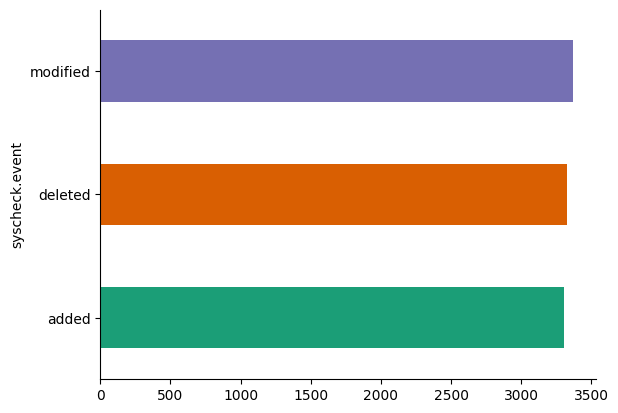

In [217]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('syscheck.event').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'File Size Before')

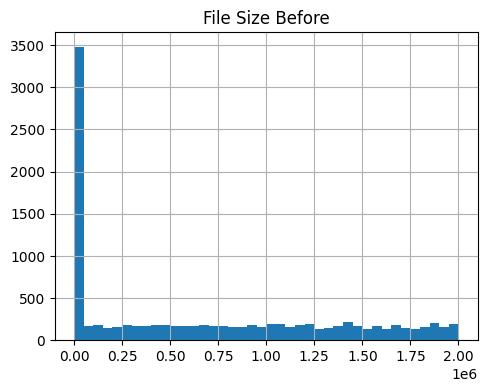

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['syscheck.size_before'].hist(bins=40)
plt.title("File Size Before")


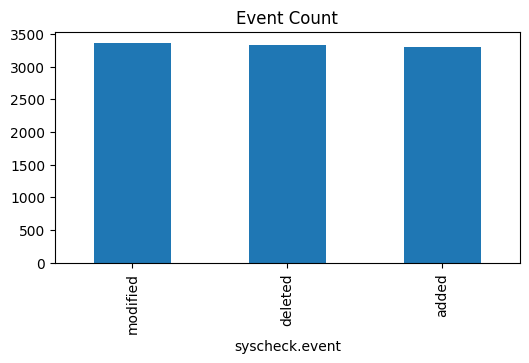

In [219]:
plt.figure(figsize=(6,3))
df['syscheck.event'].value_counts().plot(kind='bar')
plt.title("Event Count")
plt.show()

# Preprocessing


Timestamp Features

In [220]:
import os

# Extract file extension (without .)
df['file_extension'] = df['syscheck.path'].apply(lambda x: os.path.splitext(str(x))[1].lower().replace('.', ''))

# Extract parent directory
df['file_dir'] = df['syscheck.path'].apply(lambda x: os.path.dirname(str(x)))


In [221]:

# Convert '@timestamp' to datetime
df['@timestamp'] = pd.to_datetime(df['@timestamp'], format='%b %d, %Y @ %H:%M:%S.%f', errors='coerce')

# Drop rows where datetime conversion failed
df = df.dropna(subset=['@timestamp'])

# Extract datetime features
df['year'] = df['@timestamp'].dt.year
df['month'] = df['@timestamp'].dt.month
df['day'] = df['@timestamp'].dt.day
df['hour'] = df['@timestamp'].dt.hour
df['minute'] = df['@timestamp'].dt.minute
df['second'] = df['@timestamp'].dt.second
df['day_of_week'] = df['@timestamp'].dt.weekday

# Drop the original timestamp column
df = df.drop(columns=['@timestamp'])


# Feature Encoding

In [222]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for each field and replacing original column

le_event = LabelEncoder()
df['syscheck.event'] = le_event.fit_transform(df['syscheck.event'])

le_uname = LabelEncoder()
df['syscheck.uname_after'] = le_uname.fit_transform(df['syscheck.uname_after'])

le_agent = LabelEncoder()
df['agent.name'] = le_agent.fit_transform(df['agent.name'])

le_ext = LabelEncoder()
df['file_extension'] = le_ext.fit_transform(df['file_extension'])

le_dir = LabelEncoder()
df['file_dir'] = le_dir.fit_transform(df['file_dir'])


In [223]:
df.head()

,syscheck.event,syscheck.path,syscheck.size_before,syscheck.size_after,syscheck.uname_after,agent.name,file_extension,file_dir,year,month,day,hour,minute,second,day_of_week
0,2,C:\Users\User2\Desktop\collection.exe,1394097,1381807,9,7,4,0,2025,5,16,3,59,52,4
1,0,C:\Users\Project\Documents\painting.zip,0,1109802,0,4,10,0,2025,6,2,13,2,17,0
2,0,C:\Windows\Temp\enjoy.pptx,0,1519493,3,2,7,0,2025,5,9,13,0,38,4
3,2,C:\Users\Guest\Documents\energy.docx,90863,80888,0,7,3,0,2025,5,14,0,17,49,2
4,0,C:\Users\User1\Downloads\try.jpg,0,739448,5,7,5,0,2025,5,10,19,10,29,5


In [224]:
# Only keep features for modeling
features = [
    'syscheck.size_before', 'syscheck.size_after',
    'syscheck.event', 'syscheck.uname_after', 'agent.name', 'file_extension',
    'file_dir', 'year','month',	'day',	'hour',	'minute',	'second',	'day_of_week'
]

df = df[features]



In [225]:
df.head()

,syscheck.size_before,syscheck.size_after,syscheck.event,syscheck.uname_after,agent.name,file_extension,file_dir,year,month,day,hour,minute,second,day_of_week
0,1394097,1381807,2,9,7,4,0,2025,5,16,3,59,52,4
1,0,1109802,0,0,4,10,0,2025,6,2,13,2,17,0
2,0,1519493,0,3,2,7,0,2025,5,9,13,0,38,4
3,90863,80888,2,0,7,3,0,2025,5,14,0,17,49,2
4,0,739448,0,5,7,5,0,2025,5,10,19,10,29,5


# Normalize Features

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model Training

In [227]:
from sklearn.ensemble import IsolationForest


model = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
model.fit(X_scaled)

# Predict anomalies
df['anomaly'] = model.predict(X_scaled)   # -1: anomaly, 1: normal

print("Anomalies found (counts):")
print(df['anomaly'].value_counts())


Anomalies found (counts):
anomaly
 1    8000
-1    2000
Name: count, dtype: int64


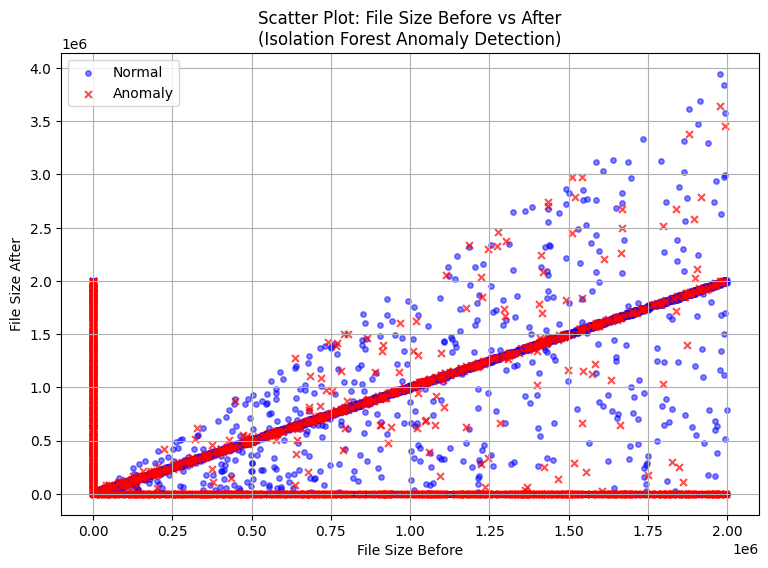

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]

plt.scatter(normal['syscheck.size_before'], normal['syscheck.size_after'],
            c='blue', label='Normal', s=15, alpha=0.5)
plt.scatter(anomaly['syscheck.size_before'], anomaly['syscheck.size_after'],
            c='red', label='Anomaly', s=25, alpha=0.7, marker='x')

plt.xlabel('File Size Before')
plt.ylabel('File Size After')
plt.title('Scatter Plot: File Size Before vs After\n(Isolation Forest Anomaly Detection)')
plt.legend()
plt.grid(True)
plt.show()


In [229]:
# Show first few detected anomalies (for investigation)
print("Sample anomalies found:")
print(df[df['anomaly']==-1].head())


Sample anomalies found:
    syscheck.size_before  syscheck.size_after  syscheck.event  \
12                     0              1185747               0   
27                     0               787810               0   
33                 29922                    0               1   
41                930803                    0               1   
43                192686                    0               1   

    syscheck.uname_after  agent.name  file_extension  file_dir  year  month  \
12                     0           9              10         0  2025      5   
27                     2           6               6         0  2025      5   
33                     1           3               6         0  2025      5   
41                     3           7               3         0  2025      5   
43                     5           4               0         0  2025      5   

    day  hour  minute  second  day_of_week  anomaly  
12    6    18      14      48            1       -1  
27